# Word Embeddings

- A simple walk-through of word2vec on a Chinese data of presidential inaugaural addresses


## Loading Corpus Raw Texts

In [1]:
import nltk
from nltk.corpus.reader import PlaintextCorpusReader
import numpy as np
import jieba, re

jieba.set_dictionary("../../../Corpus/jiaba/dict.txt.big.txt")

In [2]:
corpus_dir = "../../../Corpus/TaiwanPresidentialInaugarationSpeech_en/"

twp = PlaintextCorpusReader(corpus_dir, ".*\.txt")

In [3]:
len(twp.raw())


53833

## Word Segmentation (ckiptagger)

In [4]:
from ckiptagger import WS

/Users/Alvin/opt/anaconda3/envs/ckiptagger/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Alvin/opt/anaconda3/envs/ckiptagger/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Alvin/opt/anaconda3/envs/ckiptagger/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Alvin/opt/anaco

In [5]:
ws = WS("../../../Corpus/CKIP_WordSeg/data/")

In [6]:
## Print first 200 chars of file 13
print(twp.raw(fileids=twp.fileids()[13])[:200])

為年輕人打造一個更好的國家

各位友邦的元首與貴賓、各國駐台使節及代表、現場的好朋友，全體的國人同胞，大家好，Ta̍k－Ke Hó（閩南語），Tai-Ga Ho（客家語），Djavadjavai[1]（排灣語）！

感謝與承擔

就在剛剛，我和陳建仁已經在總統府裡面，正式宣佈，正式宣誓就任 中華民國第十四任 總統與副總統。（掌聲） 我們要感謝這塊土地對我們的栽培，感謝人民對我們的信任，


In [7]:
# word-seg the raw text and return a long string
def tokenize_raw1(raw):
    word_tok = [' '.join(para) for para in ws(nltk.regexp_tokenize(raw, r'[^\s]+'))] # para-like units
    raw_tok  = ' '.join(word_tok)
    return raw_tok

# word-seg the raw text and return list of words
def tokenize_raw2(raw):
    para_list = nltk.regexp_tokenize(raw, r'[^\s]+') # para-like units
    word_list = sum(ws(para_list),[]) 
    return word_list


def tokenize_raw3(raw):
    raw = re.sub(r'[\n\s\r]+', '', raw)
    return ' '.join([w for w in jieba.cut(raw)])

tokenize_corpus1 = np.vectorize(tokenize_raw1)
tokenize_corpus2 = np.vectorize(tokenize_raw2)
tokenize_corpus3 = np.vectorize(tokenize_raw3)

The following experiments try to see whether a few parameters may impact the performance of Chinese tokenization:

1. Segmenter: `ckiptagger` vs. `jibea`
2. Data Structure: `List` vs. `numpy.array`

It seems that `jieba` with `List` structure is the fastest?

In [8]:
twp_corpus = np.array([twp.raw(fileids=fid) for fid in twp.fileids()])
twp_corpus_list = [twp.raw(fileids=fid) for fid in twp.fileids()]

In [9]:
%%time
twp_corpus_seg1a = tokenize_corpus1(twp_corpus)

In [10]:
%%time
twp_corpus_seg1b = tokenize_corpus1(twp_corpus_list)

CPU times: user 3min 9s, sys: 45.6 s, total: 3min 55s
Wall time: 1min 28s


In [11]:
%%time
twp_corpus_seg3a = tokenize_corpus3(twp_corpus)

Building prefix dict from /Users/Alvin/Dropbox/Corpus/jiaba/dict.txt.big.txt ...
Loading model from cache /var/folders/n7/ltpzwx813c599nfxfb94s_640000gn/T/jieba.u799b9ba780e57432dfd1e51d6f89ab79.cache
Loading model cost 5.665 seconds.
Prefix dict has been built successfully.


CPU times: user 1.53 s, sys: 34.9 ms, total: 1.56 s
Wall time: 6.11 s


In [12]:
%%time
twp_corpus_seg3b = tokenize_corpus3(twp_corpus_list)

CPU times: user 332 ms, sys: 7.92 ms, total: 340 ms
Wall time: 506 ms


In [13]:
twp_corpus[13,][:200]

'為年輕人打造一個更好的國家\r\n\r\n各位友邦的元首與貴賓、各國駐台使節及代表、現場的好朋友，全體的國人同胞，大家好，Ta̍k－Ke Hó（閩南語），Tai-Ga Ho（客家語），Djavadjavai[1]（排灣語）！\r\n\r\n感謝與承擔\r\n\r\n就在剛剛，我和陳建仁已經在總統府裡面，正式宣佈，正式宣誓就任 中華民國第十四任 總統與副總統。（掌聲） 我們要感謝這塊土地對我們的栽培，感謝人民對我們的信任，'

In [14]:
twp_corpus_seg1a[13][:200]

'為 年輕人 打造 一 個 更 好 的 國家 各位 友邦 的 元首 與 貴賓 、 各 國 駐 台 使節 及 代表 、 現場 的 好朋友 ， 全體 的 國人 同胞 ， 大家 好 ， Ta̍k－Ke Hó （ 閩南語 ） ， Tai-Ga Ho （ 客家語 ） ， Djavadjavai[1 ] （ 排灣語 ） ！ 感謝 與 承擔 就 在 剛剛 ， 我 和 陳建仁 已經 在 總統府 裡面 ， 正式 宣佈'

In [15]:
twp_corpus_seg3a[13][:200]

'為 年輕人 打造 一個 更好 的 國家 各位 友邦 的 元首 與 貴賓 、 各國 駐台 使節 及 代表 、 現場 的 好 朋友 ， 全體 的 國人 同胞 ， 大家 好 ， Ta ̍ k － KeH ó （ 閩南語 ） ， Tai - GaHo （ 客家 語 ） ， Djavadjavai [ 1 ] （ 排灣 語 ） ！ 感謝 與 承擔 就 在 剛剛 ， 我 和 陳建仁 已經 在 總統府 裡面 ，'

## Data Frame Representation

In [17]:
## data frame representation
import pandas as pd
import re


twp_df = pd.DataFrame({
    "fileid": twp.fileids(),
    "corpus_raw": twp_corpus,
    "corpus_seg_ckip": twp_corpus_seg1a,
    "corpus_seg_jb": twp_corpus_seg3a
})
twp_df[['year','id','president']] = twp_df['fileid'].str.split('_', expand=True)
twp_df['president']=twp_df['president'].str.replace('.txt','')
twp_df

,fileid,corpus_raw,corpus_seg_ckip,corpus_seg_jb,year,id,president
0,1948_1_JIANGZHONGZHENG.txt,中正承國民大會依照憲法選舉為中華民國總統，擔任國家和人民的公僕，當此就職伊始，追念我 國父和...,中正 承 國民大會 依照 憲法 選舉為 中華民國 總統 ， 擔任 國家 和 人民 的 公僕 ...,中正 承 國民大會 依照 憲法 選舉 為 中華民國 總統 ， 擔任 國家 和 人民 的 公僕...,1948,1,JIANGZHONGZHENG
1,1954_2_JIANGZHONGZHENG.txt,我大陸淪陷，已經四載。全體同胞正遭受著俄寇及其傀儡朱毛，殘殺迫害，呼號引領，急切待援之時；中...,我 大陸 淪陷 ， 已經 四 載 。 全體 同胞 正 遭受 著 俄寇 及 其 傀儡 朱毛 ，...,我 大陸 淪陷 ， 已經 四載 。 全體 同胞 正 遭受 著俄寇 及其 傀儡 朱毛 ， 殘殺...,1954,2,JIANGZHONGZHENG
2,1960_3_JIANGZHONGZHENG.txt,國民大會第三次會議，重新選舉中正，賦予先復大陸，重建中華，維護國家領土主權，解救同胞生命自由...,國民大會 第三 次 會議 ， 重新 選舉 中正 ， 賦予 先 復 大陸 ， 重建 中華 ， ...,國民大會 第三次 會議 ， 重新 選舉 中正 ， 賦予 先 復 大陸 ， 重建 中華 ， 維...,1960,3,JIANGZHONGZHENG
3,1966_4_JIANGZHONGZHENG.txt,國民大會第四次會議，根據憲法，代表全國人民，選舉中正繼續擔任中華民國第四任總統，並制定戰時授...,國民大會 第四 次 會議 ， 根據 憲法 ， 代表 全 國 人民 ， 選舉 中正 繼續 擔任...,國民大會 第四次 會議 ， 根據 憲法 ， 代表 全國 人民 ， 選舉 中正 繼續 擔任 中...,1966,4,JIANGZHONGZHENG
4,1972_5_JIANGZHONGZHENG.txt,中正今天再度接受全國國民之付託，國民大會之推選，宣誓就任中華民國第五任總統，實深感於現階段在...,中正 今天 再度 接受 全 國 國民 之 付託 ， 國民大會 之 推選 ， 宣誓 就任 中華...,中正 今天 再度 接受 全國 國民 之 付託 ， 國民大會 之 推選 ， 宣誓 就任 中華民...,1972,5,JIANGZHONGZHENG
5,1978_6_JIANGJINGGUO.txt,國民大會受國民付託，依據憲法，選舉經國為中華民國第六任總統，今天經國和謝東閔副總統宣誓就職，...,國民大會 受 國民 付託 ， 依據 憲法 ， 選舉 經國 為 中華民國 第六 任 總統 ， ...,國民大會 受 國民 付託 ， 依據 憲法 ， 選舉 經國 為 中華民國 第六任 總統 ， 今...,1978,6,JIANGJINGGUO
6,1984_7_JIANGJINGGUO.txt,親愛的全國同胞們、諸位貴賓：\r\n\r\n 國民大會第七次會議，選舉經國為中華民國第七任...,親愛 的 全 國 同胞 們 、 諸 位 貴賓 ： 國民大會 第七 次 會議 ， 選舉 經國 ...,親愛 的 全國 同胞們 、 諸位 貴賓 ： 國民大會 第七次 會議 ， 選舉 經國 為 中華...,1984,7,JIANGJINGGUO
7,1990_8_LIDEHUI.txt,開創中華民族的新時代\r\n\r\n親愛的全國同胞、各位貴賓：\r\n\r\n 國民大會第...,開創 中華民族 的 新 時代 親愛 的 全 國 同胞 、 各 位 貴賓 ： 國民大會 第八 ...,開創 中華民族 的 新 時代 親愛 的 全國同胞 、 各位 貴賓 ： 國民大會 第八次 會議...,1990,8,LIDEHUI
8,1996_9_LIDEHUI.txt,經營大台灣，建立新中原\r\n\r\n各位遠道而來的友邦元首、各位特使、外交團的各位使節、各...,經營 大 台灣 ， 建立 新 中原 各位 遠道而來 的 友邦 元首 、 各位 特使 、 外交...,經營 大台灣 ， 建立 新 中原 各位 遠道而來 的 友邦 元首 、 各位 特使 、 外交團...,1996,9,LIDEHUI
9,2000_10_CHENSHUIBIAN.txt,台灣站起來——迎接向上提升的新時代\r\n\r\n各位友邦元首、各位貴賓、各位親愛的海內外同...,台灣 站起來 — — 迎接 向 上 提升 的 新 時代 各位 友邦 元首 、 各位 貴賓 、...,台灣 站 起來 — — 迎接 向上 提升 的 新 時代 各位 友邦 元首 、 各位 貴賓 、...,2000,10,CHENSHUIBIAN


In [18]:
## choose one version of segmented texts
twp_corpus_seg = twp_corpus_seg3a

In [19]:
wst =nltk.WhitespaceTokenizer()
tokenized_corpus = [wst.tokenize(text) for text in twp_corpus_seg]

In [20]:
## Concordance

twp_text = nltk.text.Text(sum(tokenized_corpus,[]))
twp_text.concordance('台灣')

Displaying 25 of 185 matches:
澎 金馬地區 ， 但凡 所 規劃 ， 無不 著眼 於 整個 中國 前途 。 台灣 與 大陸 是 中國 不可分割 的 領土 ， 所有 中國 人同 為 血脈相連
 的 普遍 期盼 ， 推行 民主 政治 及 自由 經濟 制度 ， 放棄 在 台灣 海峽 使用 武力 ， 不 阻撓 我們 在 一個 中國 的 前提 下 開展 
。 中國 的 統一 與 富強 是 所有 中國 人 共同 的 期望 。 除了 台灣 海峽兩岸 的 人民 負有 無可 旁貸 的 責任 之外 ， 遍佈 世界各地 
 今天 ， 中華民族 進入 一個 充滿希望 的 新 境界 。 今天 ， 在 台灣 的 我們 ， 以 無比 的 驕傲 與 自信 ， 堅定 地 告訴 全世界 ：
同體 ； 而 第一次 由 人民 直選 總統 ， 更 讓 我們 確立 了 以 台灣 為 主體 的 奮鬥 意識 。 如何 讓 這塊 土地 更 美麗 ， 讓 生活
以 ， 登輝 無時無刻 不在 思考 文化 的 重建 與 新生 。 希望 在 台灣 地區 的 同胞 ， 能 建立 新 的 生活 文化 ， 培養 長遠 宏大 的
地域 ， 中華民族 五千年 優秀 文化 ， 也 起源於 中原 一隅之地 ， 台灣 位於 大陸 文化 與 海洋 文化 的 匯集點 ， 近 數十年 來 ， 因 
泛 接觸 西方 民主 、 科學 及 現代 工商業 社會 文化 。 再 加上 台灣 的 教育 水準 與 發展 程度 ， 遠 超越 中國 其他 地區 ， 勢必 
育 新文化 ， 更 在 重建 新 社會 。 隨著 政治 的 民主 開放 ， 台灣 社會 已 呈現 蓬勃 的 多元化 景象 。 我們 要 運用 多元化 所 釋
讓 全民 享有 免於 匱乏 的 自由 。 當然 ， 我們 全 心 全力 在 台灣 建設 中華民國 的 同時 ， 也 不會 忘記 海外 的 中國 人 。 我們
維護 此一 地區 的 民主 、 自由 、 繁榮 。 今天 ， 中華民國 在 台灣 的 生存 與 發展 ， 已 受到 國際 社會 的 肯定 與 尊重 。 在 
領導 當局 見面 ， 直接 交換意見 。 全國 同胞們 ： 今天 我們 在 台灣 實現 了 中國 人 的 夢想 ！ 二十世紀 的 中國 人 ， 奮力 追求 
運 的 關鍵 。 我們 相信 ， 同樣 是 

In [21]:
from collections import Counter
import imageio
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from matplotlib import pyplot as plt

words = sum(tokenized_corpus,[])
words[:5]
sorted(Counter(words).items(), key=lambda x:x[1], reverse=True)  



## Check font paths
## !fc-list :lang=zh


## Load stopwords
with open('../../../Corpus/stopwords/tomlinNTUB-chinese-stopwords.txt') as f:
    stopwords = [w.strip() for w in f.readlines()]

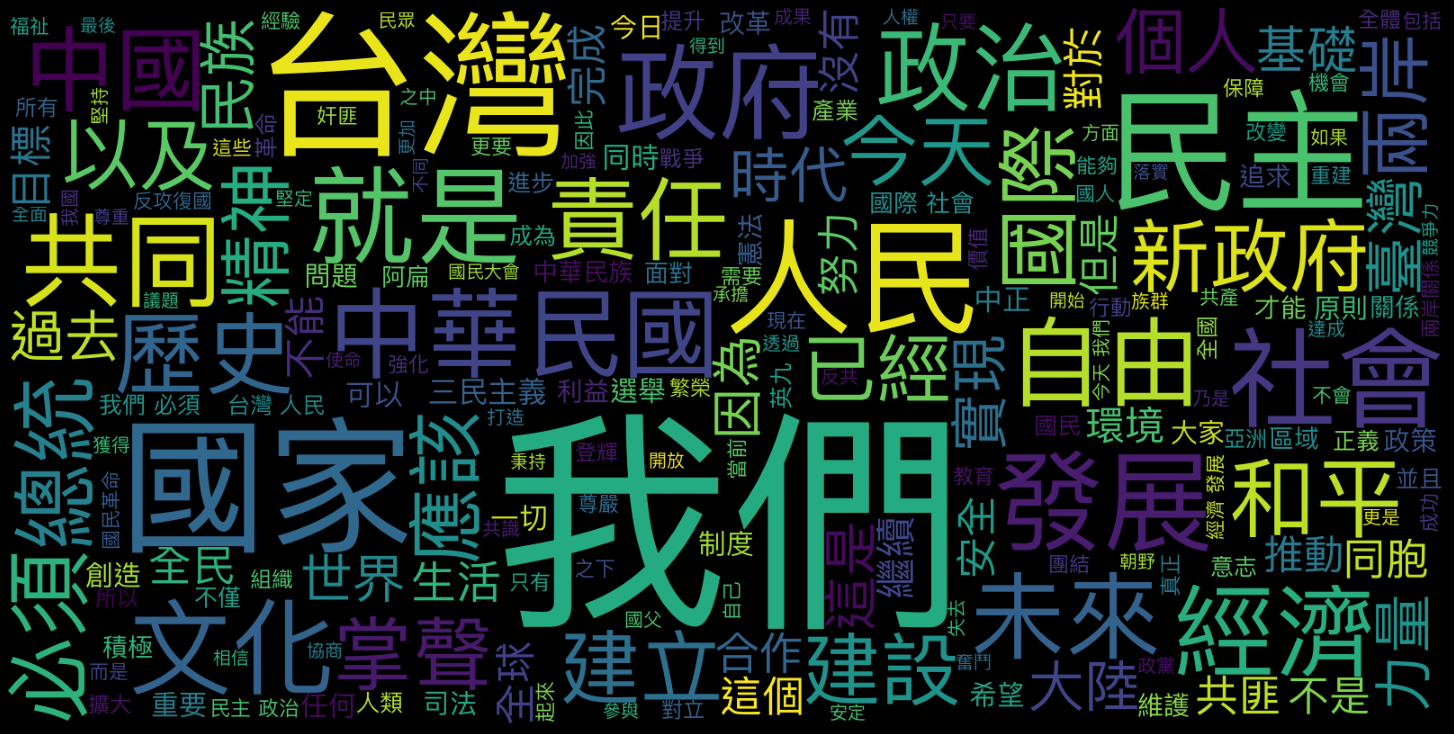

In [22]:
# Create stopwords ad hoc
stopwords = set(['一個'])
wordcloud = WordCloud(font_path="/System/Library/Fonts/PingFang.ttc",
                      background_color='black',
                      #stopwords=stopwords,
                      width=1600, height=800 
                     )  ##add  system chinese font path
wordcloud.generate(' '.join([w for w in words if w not in stopwords]))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
#plt.savefig('../data/twp-wordcloud2.png', facecolor='k', bbox_inches='tight')



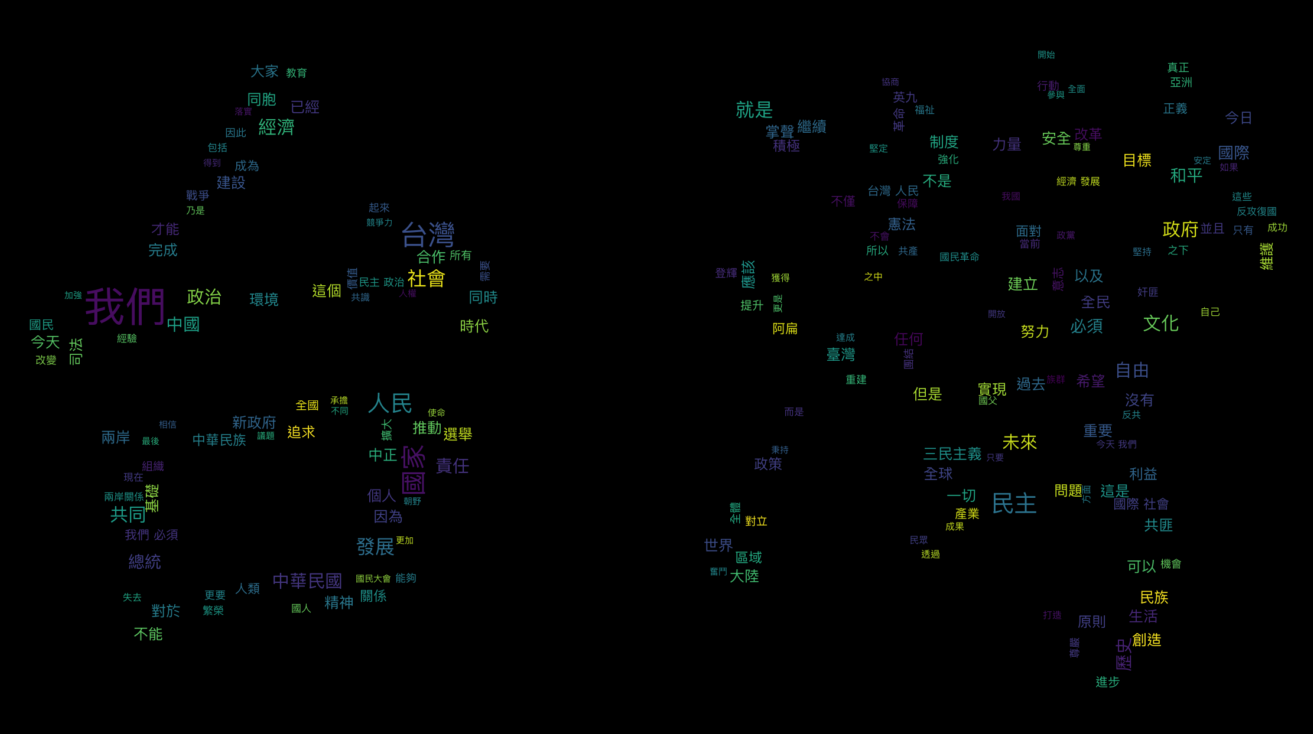

In [32]:

back_color = imageio.imread('../image/tw-char.jpg')
wordcloud = WordCloud(font_path="/System/Library/Fonts/PingFang.ttc",
                      background_color='black',
                      mask=back_color,
                      random_state=10,
                      #max_font_size=20,
                      #min_font_size=20,
                      width=1200,
                      height=800)
wordcloud.generate(' '.join([w for w in words if w not in stopwords]))
image_colors = ImageColorGenerator(back_color)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

fig_path = '../data/twp-wordcloud.png'
wordcloud.to_file(fig_path)

In [24]:
## Set features for parameters
embedding_size = 100
context_size = 20
min_word_count = 1
sample = 1e-3

In [25]:
%%time
from gensim.models import word2vec

w2v_model = word2vec.Word2Vec(tokenized_corpus, 
                              size=embedding_size,
                              window=context_size,
                              min_count=min_word_count,
                              sample=sample,
                              iter=50)

CPU times: user 4.52 s, sys: 155 ms, total: 4.68 s
Wall time: 29.3 s


In [26]:
## View Similar Words
w2v_model.wv.most_similar('人民', topn=5)
w2v_model.wv.most_similar('台灣', topn=5)

[('圖像', 0.8682724237442017),
 ('正面', 0.8600305318832397),
 ('讓', 0.8588578701019287),
 ('一直', 0.8482418060302734),
 ('一年', 0.8449902534484863)]

In [27]:
similar_words = {key_word:[similar_word[0] for similar_word in w2v_model.wv.most_similar(key_word, topn=6)]
                          for key_word in ['台灣','人民','國家','民主','中共','大陸','共匪','自由']}
similar_words

{'台灣': ['圖像', '正面', '讓', '一直', '一年', '一段'],
 '人民': ['政黨', '高於', '爭端', '主人', '信任', '個人'],
 '國家': ['利益', '最大', '必以', '重大', '落幕', '高於'],
 '民主': ['里程碑', '劃時代', '顛簸', '全球華人', '歷史性', '毫不'],
 '中共': ['韓的', '互相', '機構', '參加', '終止', '保衛'],
 '大陸': ['光復', '志在', '推', '及於', '商學', '集中'],
 '共匪': ['乃是', '其', '奸匪', '鬥爭', '顛覆', '敵人'],
 '自由': ['志在', '這就是說', '己任', '剷除', '推', '真積力']}

In [28]:
## Visualization

from sklearn.manifold import TSNE
all_words = sum([[key_word]+similar_words for key_word, similar_words in similar_words.items()], [])
all_words_vec = w2v_model.wv[all_words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(all_words_vec)
labels=all_words

In [29]:
## Chinese Font Issues in Plotting

from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
# 解决负号'-'显示为方块的问题
# rcParams['axes.unicode_minus']=False
myfont = FontProperties(fname='/System/Library/Fonts/PingFang.ttc',
 size=12)
# plt.title('乘客等级分布', fontproperties=myfont)
# plt.ylabel('人数', fontproperties=myfont)
# plt.legend(('头等舱', '二等舱', '三等舱'), loc='best', prop=myfont)

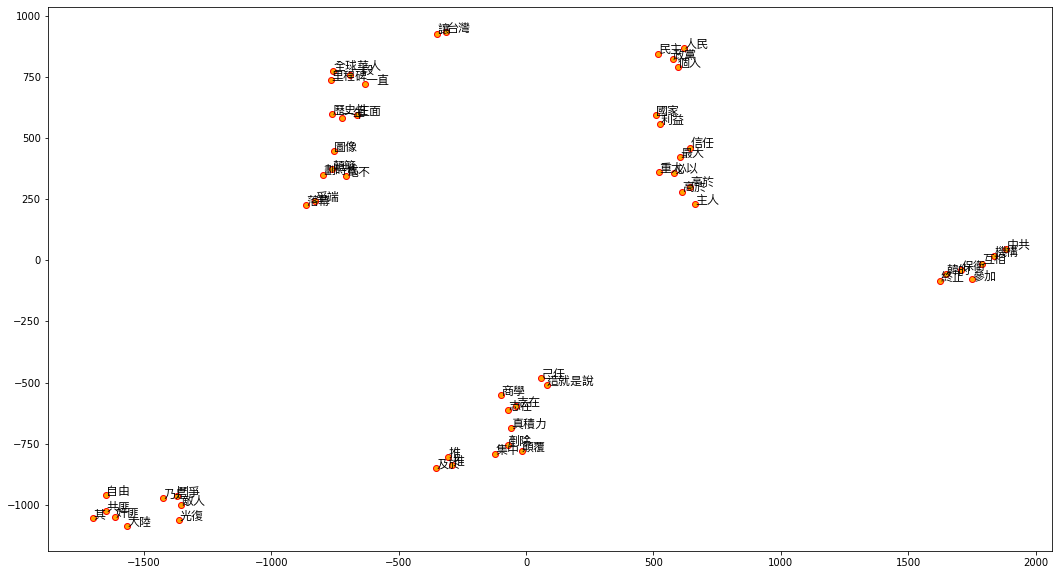

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.scatter(T[:,0],T[:,1], c="orange", edgecolors='r')
for label,x,y in zip(labels, T[:,0],T[:,1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0,0), textcoords='offset points',fontproperties=myfont)